# Simple Regression NN
To Try:
- Convert employee demand to integers instead

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import  DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from TestTrainData import TrainData, TestData

import sys

In [2]:
# Model imports
from MultiLabelRegression import MultiLabelRegression
from MultiLayerMultiLabelRegression import MultiLayerMultiLabelRegression

In [3]:
# Import modules from parent directory
sys.path.insert(0,'..')

In [4]:
from ipynb.fs.full.training_preprocessing import GetDataset

In [5]:
df = GetDataset()
#df

In [6]:
# set x equal to all columns except for the transaction_count and workforce_type_1
x = df.drop(['transaction_count', 'workforce_type_1','workforce_type_2', 'workforce_type_3','workforce_type_4'], axis=1)
# convert x to a 2d array
x = x.values.tolist()


# set y equal to the transaction_count and workforce_type_1 columns
y = df[['transaction_count', 'workforce_type_1', 'workforce_type_2', 'workforce_type_3','workforce_type_4']]
# convert y to an array
y = y.values.tolist()

In [7]:
TEST_SIZE = 0.33

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)

In [8]:
train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))


test_data = TestData(torch.FloatTensor(X_test))

In [9]:
def train(model, optimizer, criterion, num_epochs, train_loader):
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            # Forward pass
            outputs = model(inputs)
            # Compute loss
            loss = criterion(outputs, targets)
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Print progress
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [75]:
# Hyperparameters
LEARNING_RATE = 0.00001
EPOCHS = 1000

In [72]:
# Models
model = MultiLayerMultiLabelRegression(11, 5)
#model = MultiLabelRegression(11, 5)
model.to(device)

MultiLayerMultiLabelRegression(
  (linear): Linear(in_features=11, out_features=5, bias=True)
)

In [76]:
# Define the loss function and the optimizer
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
#optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)


In [77]:
train(model, optimizer, criterion, EPOCHS, train_data)

Epoch [1/1000], Loss: 2.4915
Epoch [2/1000], Loss: 2.3084
Epoch [3/1000], Loss: 2.2360
Epoch [4/1000], Loss: 2.2048
Epoch [5/1000], Loss: 2.1902
Epoch [6/1000], Loss: 2.1827
Epoch [7/1000], Loss: 2.1783
Epoch [8/1000], Loss: 2.1756
Epoch [9/1000], Loss: 2.1739
Epoch [10/1000], Loss: 2.1724
Epoch [11/1000], Loss: 2.1714
Epoch [12/1000], Loss: 2.1706
Epoch [13/1000], Loss: 2.1699
Epoch [14/1000], Loss: 2.1693
Epoch [15/1000], Loss: 2.1688
Epoch [16/1000], Loss: 2.1684
Epoch [17/1000], Loss: 2.1681
Epoch [18/1000], Loss: 2.1676
Epoch [19/1000], Loss: 2.1673
Epoch [20/1000], Loss: 2.1670
Epoch [21/1000], Loss: 2.1667
Epoch [22/1000], Loss: 2.1664
Epoch [23/1000], Loss: 2.1662
Epoch [24/1000], Loss: 2.1659
Epoch [25/1000], Loss: 2.1657
Epoch [26/1000], Loss: 2.1654
Epoch [27/1000], Loss: 2.1652
Epoch [28/1000], Loss: 2.1650
Epoch [29/1000], Loss: 2.1649
Epoch [30/1000], Loss: 2.1647
Epoch [31/1000], Loss: 2.1645
Epoch [32/1000], Loss: 2.1644
Epoch [33/1000], Loss: 2.1644
Epoch [34/1000], Lo

KeyboardInterrupt: 

## Evaluating model performance

In [78]:
Xtest = torch.FloatTensor(X_test)
test_loader = DataLoader(dataset=Xtest, batch_size=1)

# Set the model to eval mode and generate a list of predictions for the test data
model.eval()
y_pred_list = []
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_pred_list

[[42.084815979003906,
  1.0257083177566528,
  3.078904628753662,
  4.094869613647461,
  0.8143854141235352],
 [44.945011138916016,
  1.0023633241653442,
  3.3272452354431152,
  4.319940090179443,
  0.8424151539802551],
 [19.217798233032227,
  0.9981249570846558,
  2.886559009552002,
  3.8185760974884033,
  0.379055380821228],
 [17.72307777404785,
  1.0216054916381836,
  2.829988956451416,
  3.7775795459747314,
  0.2921537160873413],
 [9.08970832824707,
  1.0219727754592896,
  2.2711901664733887,
  3.3321683406829834,
  0.3835160732269287],
 [9.552064895629883,
  0.9888253211975098,
  2.313119411468506,
  3.252420663833618,
  0.30760079622268677],
 [14.37075138092041,
  1.0084784030914307,
  2.6553688049316406,
  3.597598075866699,
  0.3442019522190094],
 [11.992635726928711,
  0.9939275979995728,
  2.3600451946258545,
  3.3018946647644043,
  0.32134807109832764],
 [38.703346252441406,
  1.0261249542236328,
  3.6319174766540527,
  4.6591410636901855,
  0.6141765117645264],
 [25.84559631

In [79]:
# create an array of only the first object of each array inside y_pred_list
transaction_count_predictions = [a[0] for a in y_pred_list]
transaction_count_actuals = [a[0] for a in y_test]

In [80]:
# Calculate the MSE and MAE between the predictions and the actual values
mse = mean_squared_error(y_test, y_pred_list)
mae = mean_absolute_error(y_test, y_pred_list)

print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')


MSE: 20.96, MAE: 1.63


In [81]:
# Calculate the MSE and MAE between only the transaction_count prediction and the actual values
mse = mean_squared_error(transaction_count_actuals, transaction_count_predictions)
mae = mean_absolute_error(transaction_count_actuals, transaction_count_predictions)

print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')

MSE: 103.75, MAE: 6.67


In [82]:
# Calculate SMAPE between actual and predicted values.
def smape(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    smape_val = (100.0 / actual.size) * np.sum(2.0 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))
    return smape_val

In [83]:
smape = smape(y_pred_list, y_test)
#print(f'SMAPE: {smape:.2f}')
print(smape)

37.44642656526463


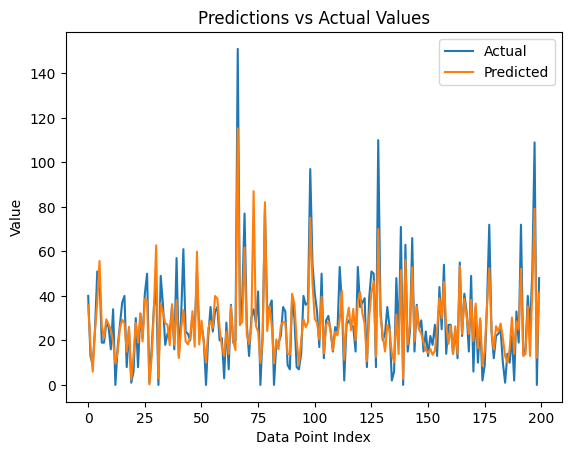

In [25]:
# Graph the predictions vs the actual values
import matplotlib.pyplot as plt

#plt.scatter(transaction_count_predictions, transaction_count_actuals, alpha=0.5)
plt.plot(transaction_count_actuals[400:600], label='Actual')
plt.plot(transaction_count_predictions[400:600], label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()